#Configuring and importing libraries

In [ ]:
%pip install arabic-stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 12.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install camel-tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 32.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for camel-kenlm: filename=camel_kenlm-2023.3.17.2-cp310-cp310-linux_x86_64.whl size=1071737 sha256=51630a7900498fc273d24467f1e557666d98e70f51c5268283af43f22f74a6a3
  Stored in directory: /root/.cache/pip/wheels/29/c5/32/09633c3b70fdfc470b2fb912bd9e90d8d6814df68c794dcaa6
Successfully built camel-kenlm


## get important libraries and packages in project

In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import accuracy_score
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import arabicstopwords.arabicstopwords as ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar

from nltk.stem import ISRIStemmer
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf

#Loading Data




In [ ]:
! gdown "1Dj9OSnSg-kvpNjJTxhaWW_FpQvh04s3o"  #our LABR-book-reviews.csv

/bin/bash: line 1: gdown: command not found


In [ ]:
Data = pd.read_csv("/kaggle/working/LABR-book-reviews.csv")

In [ ]:
Data.head()

,sentiment,txt
0,0,مكملتش اكتر 30 صفحه بضان
1,0,النادر ان يعجبني الفلم اكثر الروايه تفوق دعاء...
2,0,كتاب سي الاسلوب ممتع نهايه مفتوحه والكتاب بوجه...
3,0,قصه مشوقه ونهايه مفتوحه اسوء صفحه في الروايه ...
4,0,ابدع الكاتب سرد الحقائق التاريخيه او بمعني اصح...


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16448 entries, 0 to 16447
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  16448 non-null  int64 
 1   txt        16448 non-null  object
dtypes: int64(1), object(1)
memory usage: 257.1+ KB


In [ ]:
Data['sentiment'].value_counts()

0    8224
1    8224
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

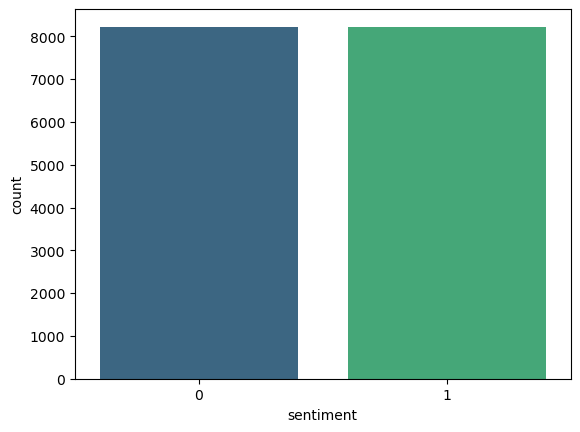

In [ ]:
sns.countplot(x='sentiment', data=Data, palette='viridis')

In [ ]:
Data['txt'][10:20]

10     كوميديا ساخرة عن نظام اسئلة الإمتحانات العقيم...
11     أذكر أني قرأته وأنا طفلة او بدايات المراهقة ....
12                     لم يعجبني والشريط منه افضل وامتع
13     كتاب حلو ويستاهل القراءة اكثر من مرة ولازم ال...
14     أول رواية أقرأها لأحلام لغتها عذبة ساحرة لذيذ...
15     روايه ممتعه تحمست لها اكثر لما عرفت انها نقل ...
16     متوسطة . بالرغم من نضوج أسلوب الكاتبة فيها أك...
17     كتاب لا بأس به، لطيف و خفيف، أسلوب أستاذ أحمد...
18     كتاب ممل جدا و لم استمتع الا باولة و يدخل فى ...
19                            ما استطعت اكمال الرواية .
Name: txt, dtype: object

# Preprocessing

## Cleaning data



1.   Reducing Orthographic Ambiguity
2.   Remove stopwords
3.   Removing Punctuations



In [ ]:
# Get a list of stop words
stop_words = ast.stopwords_list()

# Define a string containing Arabic punctuations
arabic_punctuations = '''`÷×؛<>_():*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''

# Get a string containing English punctuations
english_punctuations = string.punctuation

# Concatenate Arabic and English punctuations to create a single list
punctuations_list = arabic_punctuations + english_punctuations

In [ ]:
def ortho_normalize(text):
    text = normalize_alef_maksura_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    return text

def remove_stop_words(text):
    return ' '.join(word for word in str(text).split() if word not in stop_words)

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
#applay the filter on the text

Data['txt'] = Data['txt'].apply(remove_stop_words)

Data['txt'] = Data['txt'].apply(remove_punctuations)

Data['txt'] = Data['txt'].apply(ortho_normalize)


### stemming/lemmatization

*   snow_stemmer not worked well give long vectors with no change in accuracy
*   lemmatization also didn't affect more in results



In [ ]:


#   Applies stemming to the input Arabic text using the ISRI Arabic stemmer.

isri_stemmer = ISRIStemmer()

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def stemming(text):
    s = " "
    x = w_tokenizer.tokenize(text)
    return s.join([isri_stemmer.stem(w) for w in x])

Data["stemming Words"] = Data['txt'].apply(stemming)


In [ ]:
#worse in preformance than the isri stemmer
'''snow_stemmer = SnowballStemmer(language='arabic')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def stemming(text):
  s=" "
  x = w_tokenizer.tokenize(text)
  return s.join([snow_stemmer.stem(w) for w in x])

Data["stemming Words"] = Data['txt'].apply(stemming)
'''

'snow_stemmer = SnowballStemmer(language=\'arabic\')\n\nw_tokenizer = nltk.tokenize.WhitespaceTokenizer()\ndef stemming(text):\n  s=" "\n  x = w_tokenizer.tokenize(text)\n  return s.join([snow_stemmer.stem(w) for w in x])\n\nData["stemming Words"] = Data[\'txt\'].apply(stemming)\n'

# Embedding : MarBert model





In [ ]:
#specifys the model we are using the intilze the bert toknizer and embedding
marbert_model_path = 'UBC-NLP/MARBERT'
tokenizer = AutoTokenizer.from_pretrained(marbert_model_path, from_tf=True)
marbert_model = TFAutoModel.from_pretrained(marbert_model_path, output_hidden_states=True)

def bert_tokenize(texts: str) -> list:
    max_len = 0
    for text in texts:
        max_len = max(len(tokenizer.tokenize(f'[CLS] {text} [SEP]')), max_len)
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_len)
    return (tokens['input_ids'], tokens['attention_mask'], tokens['token_type_ids'])

def get_embeddings(tokens):
    ids = tf.convert_to_tensor(tokens[0])
    mask = tf.convert_to_tensor(tokens[1])
    type_ids = tf.convert_to_tensor(tokens[2])
    hidden_states = marbert_model(input_ids=ids, attention_mask=mask, token_type_ids=type_ids)[2]
    sentence_embd = tf.reduce_mean(tf.reduce_sum(tf.stack(hidden_states[-4:]), axis = 0), axis=1)
    return sentence_embd

All model checkpoint layers were used when initializing TFBertModel.

All the layers of TFBertModel were initialized from the model checkpoint at UBC-NLP/MARBERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:

# DIVIDING THE DATA INTO BATCHEoS AND PROCESSING THAT TO KEEP THE TRANING STABLE due to hardware limitations
from tqdm import tqdm

# Assuming your data is already loaded and `Data['txt'].values` is available
batch_size=4
batch_size = Data['txt'].values.shape[0] // 10
rem = text_offensive.shape[0] % 10
start_batch_idx = 0  # Set this variable to the desired starting batch index

for batch_idx in range(start_batch_idx, 10):
    if batch_idx < 9:
        batch_data = Data['txt'].values[batch_idx * batch_size : (batch_idx + 1) * batch_size]
    else:
        batch_data = Data['txt'].values[batch_idx * batch_size :]

    x_batch = np.empty(shape=(batch_data.shape[0], 768), dtype=np.float64)

    for i, text in enumerate(tqdm(batch_data, desc=f'Processing batch {batch_idx+1}..')):
        tokens = bert_tokenize([text])
        x_batch[i] = get_embeddings(tokens)

    np.save(f'batch_features_{batch_idx}.npy', x_batch)
    print(f'Batch {batch_idx+1} features saved.')

print("All batches processed and saved.")

Processing batch 1..: 100%|██████████| 1644/1644 [05:35<00:00,  4.90it/s]


Batch 1 features saved.


Processing batch 2..: 100%|██████████| 1644/1644 [05:34<00:00,  4.91it/s]


Batch 2 features saved.


Processing batch 3..: 100%|██████████| 1644/1644 [05:31<00:00,  4.95it/s]


Batch 3 features saved.


Processing batch 4..: 100%|██████████| 1644/1644 [05:31<00:00,  4.95it/s]


Batch 4 features saved.


Processing batch 5..: 100%|██████████| 1644/1644 [05:31<00:00,  4.96it/s]


Batch 5 features saved.


Processing batch 6..: 100%|██████████| 1644/1644 [05:31<00:00,  4.96it/s]


Batch 6 features saved.


Processing batch 7..: 100%|██████████| 1644/1644 [05:40<00:00,  4.83it/s]


Batch 7 features saved.


Processing batch 8..: 100%|██████████| 1644/1644 [05:55<00:00,  4.62it/s]


Batch 8 features saved.


Processing batch 9..: 100%|██████████| 1644/1644 [05:56<00:00,  4.61it/s]


Batch 9 features saved.


Processing batch 10..: 100%|██████████| 1652/1652 [05:57<00:00,  4.62it/s]

Batch 10 features saved.
All batches processed and saved.


In [ ]:

# Create an empty list to store the batch feature arrays
all_batches = []

start_batch_idx = 0

for batch_idx in range(start_batch_idx, 10):
    batch_file_path = f'batch_features_{batch_idx}.npy'
    batch_features = np.load(batch_file_path)
    all_batches.append(batch_features)

# Concatenate all the batches along the first axis (axis=0)
x_train = np.concatenate(all_batches, axis=0)

# Now `x_train` contains the combined feature array from all the batches


In [ ]:
import numpy as np

# ... (previous code to combine all batches into x_train)

# Save the combined feature array to a file
np.save('x_train_marbert_embed.npy', x_train)

print("Combined feature array saved as 'x_train.npy'.")


Combined feature array saved as 'x_train.npy'.


In [ ]:

file_path = '/kaggle/working/x_train_marbert_embed.npy'

# Load the data from the .npy file
x_train = np.load(file_path)




In [ ]:
x_train.shape

(16448, 768)

#### split data after loading embedding

In [ ]:

# Assuming you have 'embeddings' and 'labels' arrays
# Here 'embeddings' should be of shape (num_samples, 768) and 'labels' of shape (num_samples, 1)

# Number of samples to select for each label
num_samples_per_label = 5000

# Select indices for samples with label 1
indices_label_1 = np.where(Data["sentiment"] == 1)[0]
selected_indices_label_1 = np.random.choice(indices_label_1, num_samples_per_label, replace=False)

# Select indices for samples with label 0
indices_label_0 = np.where(Data["sentiment"] == 0)[0]
selected_indices_label_0 = np.random.choice(indices_label_0, num_samples_per_label, replace=False)

# Combine the selected indices for both labels
selected_indices = np.concatenate([selected_indices_label_1, selected_indices_label_0])

# Create the new dataset with selected samples and their embeddings
selected_data = x_train[selected_indices]
selected_labels = Data["sentiment"][selected_indices]

# Shuffle the dataset
shuffled_indices = np.random.permutation(len(selected_data))
selected_data = x_train[shuffled_indices]
selected_labels =  Data["sentiment"][shuffled_indices]

# Now you have a new dataset 'selected_data' containing embeddings
# and 'selected_labels' containing corresponding labels for 5000 samples of each label (1 and 0).
remaining_indices = np.setdiff1d(np.arange(len(x_train)),shuffled_indices)

# Create the dataset with the remaining samples and their embeddings
remaining_data = x_train[remaining_indices]
remaining_labels = Data["sentiment"][remaining_indices]

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have 'selected_data' and 'selected_labels' arrays
# 'selected_data' should be of shape (num_samples, 768) and 'selected_labels' of shape (num_samples, 1)

# Split the selected data into training and testing sets
test_size = 0.2  # Proportion of data to use as the test set
random_state = 42  # Set a random seed for reproducibility

# Perform the split
X_train_ara, X_test_ara, y_train_ara, y_test_Ara = train_test_split(
    selected_data, selected_labels, test_size=test_size, random_state=random_state
)

# Now you have the training and testing sets:
# X_train_ara: Feature embeddings for the training set
# y_train_ara: Corresponding labels for the training set
# X_test_ara: Feature embeddings for the testing set
# y_test_Ara: Corresponding labels for the testing set

In [ ]:
remaining_data
remaining_labels

(6448, 768)

In [ ]:
import numpy as np

# Assuming you have already defined shuffled_indices, selected_data, and selected_labels

# Get the indices of the entire x_train array
all_indices = np.arange(len(x_train))

# Find the indices that were not selected by inverting shuffled_indices using the ~ operator
remaining_indices = np.setdiff1d(all_indices, shuffled_indices, assume_unique=True)

# Now 'remaining_indices' contains the indices that were not selected
# You can use these indices to get the corresponding data and labels
remaining_data = x_train[remaining_indices]
remaining_labels = Data["sentiment"][remaining_indices]


In [ ]:
shuffled_indices

array([4765, 5992, 4315, ..., 5108, 2139, 4252])

In [ ]:
remaining_indices = np.setdiff1d(np.arange(len(x_train)),shuffled_indices)

In [ ]:
remaining_indices

array([10000, 10001, 10002, ..., 16445, 16446, 16447])

In [ ]:
remaining_data.shape

(6448, 768)

In [ ]:

# Convert the nested list to a NumPy array (with inner lists converted to arrays)
nested_array = np.array([np.array(sublist) for sublist in document_embeddings])


print("Shape of the NumPy array:", nested_array.shape)


Shape of the NumPy array: (16448,)


/tmp/ipykernel_32/248390408.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nested_array = np.array([np.array(sublist) for sublist in document_embeddings])


In [ ]:
Data.shape

(16448, 4)

In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000, solver='saga',C=1)

In [ ]:
global_y_train.shape

(8000,)

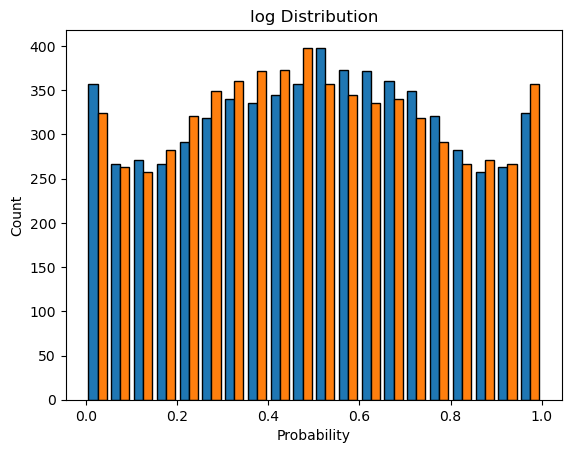

In [ ]:

logistic_classifier.fit(global_X_train_counts, global_y_train)
logistic_probs = logistic_classifier.predict_proba(global_remaning_counts)


plt.hist(logistic_probs, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('log Distribution')
plt.show()

#Step1 : **Baseline Model** *classify by three model by given labels*

In [ ]:

train_x_used=X_train_ara
train_y_used=y_train_ara
test_x_used=X_test_ara
test_y_used=y_test_Ara




In [ ]:
x_train_embedded
Data["sentiment"]

In [ ]:
X_train_global,X_test_global,y_train_global,y_test_global = train_test_split(x_train_embedded, Data["sentiment"],test_size=0.2, random_state = 42)

## define SVM  and Logistic Regression classifiers

---



In [ ]:
#trained on the data after being labled
svm_classifier_before = SVC(kernel='rbf', C=1, probability=True)
logistic_classifier_before = LogisticRegression(max_iter=1000, solver='saga', C=1)

## train and evalute the models

In [ ]:
# Train each classifier on its respective dataset
svm_classifier_before.fit(X_train_global,y_train_global)
logistic_classifier_before.fit(X_train_global, y_train_global)

# Make predictions for each classifier
y_pred_svm = svm_classifier_before.predict(X_test_global)
y_pred_logistic = logistic_classifier_before.predict(X_test_global)

print("SVM",classification_report(y_test_global, y_pred_svm))
print("logistic_classifier ",classification_report(y_test_global, y_pred_logistic))

SVM               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1692
           1       0.85      0.85      0.85      1598

    accuracy                           0.86      3290
   macro avg       0.86      0.86      0.86      3290
weighted avg       0.86      0.86      0.86      3290

logistic_classifier                precision    recall  f1-score   support

           0       0.86      0.85      0.86      1692
           1       0.85      0.85      0.85      1598

    accuracy                           0.85      3290
   macro avg       0.85      0.85      0.85      3290
weighted avg       0.85      0.85      0.85      3290



## define GRU classifier

*   Used high droup out  to avoid overfitting in model




In [ ]:
X_train_gru_global = X_train_global.reshape(X_train_global.shape[0], 1, X_train_global.shape[1]) # reshape input to allow for GRU

# Create the GRU model
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier = Sequential()
gru_classifier.add(GRU(256, input_shape=(X_train_gru_global.shape[1], X_train_gru_global.shape[2]), return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(128, return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(64))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## train and evalute Gru

In [ ]:
gru_classifier.fit(X_train_gru_global, y_train_global, epochs=5,batch_size=128)

Epoch 1/5
103/103 [==============================] - 7s 11ms/step - loss: 0.4154 - accuracy: 0.8108
Epoch 2/5
103/103 [==============================] - 1s 8ms/step - loss: 0.3270 - accuracy: 0.8601
Epoch 3/5
103/103 [==============================] - 1s 7ms/step - loss: 0.3086 - accuracy: 0.8697
Epoch 4/5
103/103 [==============================] - 1s 7ms/step - loss: 0.2964 - accuracy: 0.8765
Epoch 5/5
103/103 [==============================] - 1s 7ms/step - loss: 0.2792 - accuracy: 0.8830


In [ ]:
X_test_gru_global = X_test_global.reshape(X_test_global.shape[0], 1, X_test_global.shape[1])

y_pred_gru = gru_classifier.predict(X_test_gru_global)

y_pred_binary = (y_pred_gru > 0.5).astype(int)

print("GRU",classification_report(y_test_global, y_pred_binary))

103/103 [==============================] - 0s 3ms/step
GRU               precision    recall  f1-score   support

           0       0.87      0.88      0.88      1692
           1       0.87      0.86      0.87      1598

    accuracy                           0.87      3290
   macro avg       0.87      0.87      0.87      3290
weighted avg       0.87      0.87      0.87      3290



## trained and test on the 10000 labled data only

In [ ]:
svm_classifier = SVC(kernel='rbf', C=1, probability=True)
logistic_classifier = LogisticRegression(C=0.1)

In [ ]:
# Train each classifier on its respective dataset
svm_classifier.fit(train_x_used, train_y_used)
logistic_classifier.fit(train_x_used, train_y_used)

# Make predictions for each classifier
y_pred_svm = svm_classifier.predict(test_x_used)
y_pred_logistic = logistic_classifier.predict(test_x_used)
print("SVM",classification_report(test_y_used, y_pred_svm))
print("logistic_classifier ",classification_report(test_y_used, y_pred_logistic))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1025
           1       0.85      0.85      0.85       975

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

logistic_classifier                precision    recall  f1-score   support

           0       0.86      0.86      0.86      1025
           1       0.85      0.85      0.85       975

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.86      0.85      0.86      2000



In [ ]:
X_train_gru = train_x_used.reshape(train_x_used.shape[0], 1, train_x_used.shape[1])

# Create the GRU model
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier = Sequential()
gru_classifier.add(GRU(256, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(128, return_sequences=True))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(GRU(64))
gru_classifier.add(Dropout(0.2))

gru_classifier.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
gru_classifier.fit(X_train_gru, train_y_used, epochs=10,batch_size=128)

Epoch 1/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0977 - accuracy: 0.9620
Epoch 2/10
63/63 [==============================] - 1s 11ms/step - loss: 0.0924 - accuracy: 0.9641
Epoch 3/10
63/63 [==============================] - 0s 8ms/step - loss: 0.0769 - accuracy: 0.9710
Epoch 4/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0864 - accuracy: 0.9644
Epoch 5/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.9766
Epoch 6/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0706 - accuracy: 0.9726
Epoch 7/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9721
Epoch 8/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9790
Epoch 9/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0558 - accuracy: 0.9803
Epoch 10/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0558 - accuracy: 0.9800


In [ ]:
X_test_gru = test_x_used.reshape(test_x_used.shape[0], 1, test_x_used.shape[1])

y_pred_gru = gru_classifier.predict(X_test_gru)


63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred_binary = (y_pred_gru > 0.5).astype(int)
print("GRU",classification_report(test_y_used, y_pred_binary))

GRU               precision    recall  f1-score   support

           0       0.89      0.81      0.85      1025
           1       0.82      0.90      0.86       975

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



# Step 2 :**semi supervise learning**

*    create new labels



In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # For the progress bar


In [ ]:

train_x_used_semi=csr_matrix(X_train_ara)
train_y_used_semi=y_train_ara
test_x_used_semi=csr_matrix(X_test_ara)
test_y_used_semi=y_test_Ara
reamining_data_used=csr_matrix(remaining_data)


In [ ]:
# Create the SVM ,  logistic ,gru models

svm_classifier_semi = SVC(max_iter=2,kernel='rbf', C=1, probability=True)
logistic_classifier_semi = LogisticRegression(max_iter=2, solver='saga', C=1)

from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier_semi = Sequential()
gru_classifier_semi.add(GRU(256, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(GRU(128, return_sequences=True))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(GRU(64))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_classifier_semi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
confidence_threshold = 0.9

In [ ]:
from scipy.sparse import vstack,csr_matrix
## allow store new labels and remove from unlabel data
def compare_arrays(array1, array2, array3,threshold,unlabled_data,labeled_x,labeled_y):
    assert array1.shape == array2.shape == array3.shape, "Arrays must have the same shape."

    indexes_to_delete = []

    for index, (elem1, elem2, elem3) in enumerate(zip(array1, array2, array3)):
        if elem1 > threshold and elem2 > threshold and elem3 > threshold:
            #
            #store the indexes of the elements that we will remove from the unlabeled
            indexes_to_delete.append(index)
            #append the elment the meet our threshhold to the traninf data ,using vstack because its a sparce matrix
            labeled_x = vstack([labeled_x, csr_matrix(unlabled_data[index])], format='csr')
            #append the predection to the traning data
            labeled_y = np.concatenate([labeled_y, np.array([1])])

        elif elem1 < (1-threshold) and elem2 < (1-threshold) and elem3 < (1-threshold):

            indexes_to_delete.append(index)
            labeled_x = vstack([labeled_x, csr_matrix(unlabled_data[index])], format='csr')
            labeled_y = np.concatenate([labeled_y, np.array([0])])
        # you can add more conditions here.


    print("############")
    print(f"  unlabeled shape before deletion {unlabled_data.shape}")
    print(f"  indexes_to_delete shape before deletion {len(indexes_to_delete)}")
    print(f"  unlabeled shape before deletion {unlabled_data.shape}")
    # Drop elements from the main_array using the stored indexes
    if indexes_to_delete is not None and unlabled_data is not None:

        unlabled_data = np.delete(unlabled_data,indexes_to_delete,axis=0)


    print(type(unlabled_data))

    print("############")
    unlabled_data = np.squeeze(unlabled_data)
    print(f"  unlabeled shape after deletion {csr_matrix(unlabled_data).shape}")
    return csr_matrix(unlabled_data),labeled_x,labeled_y

In [ ]:
confidence_threshold = 0.9

## train semi supervised model

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


# Number of iterations for semi-supervised learning
num_iterations = 50


# Semi-supervised learning using iterative approach
for _ in range(num_iterations):
    print('step 1')
    # Step 1: Train models on labeled data
    print('train svm')
    svm_classifier_semi.fit(train_x_used_semi, train_y_used_semi)
    print('log')
    logistic_classifier_semi.fit(train_x_used_semi, train_y_used_semi)
    print('gru')
    X_train_gru = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], 1, train_x_used_semi.shape[1])

    gru_classifier_semi.fit(X_train_gru, train_y_used_semi, epochs=1, batch_size=64)  # Adjust epochs and batch size as needed
    print('step 2')

    # Step 2: Make predictions on unlabeled data
    svm_predictions = svm_classifier_semi.predict(reamining_data_used)
    logistic_predictions = logistic_classifier_semi.predict(reamining_data_used)

    global_remaning_counts_gru = reamining_data_used.toarray().reshape(reamining_data_used.shape[0], 1, reamining_data_used.shape[1])

    gru_predictions = gru_classifier_semi.predict(global_remaning_counts_gru)

    svm_predictions = np.squeeze(svm_predictions)
    logistic_predictions = np.squeeze(logistic_predictions)
    gru_predictions = np.squeeze(gru_predictions)
    print('step 3')

    svm_confidences = svm_classifier_semi.predict_proba(reamining_data_used)[:, 1]
    logistic_confidences = logistic_classifier_semi.predict_proba(reamining_data_used)[:, 1]

    reamining_data_used,train_x_used_semi,train_y_used_semi = compare_arrays(svm_confidences,
                                                                                     logistic_confidences,
                                                                                     gru_predictions,confidence_threshold,
                                                                                     global_remaning_counts_gru,
                                                                                     train_x_used_semi,train_y_used_semi)


    print(f"  labeled shape end of run deletion {train_x_used_semi.shape}")
    print(f"  nmber of unlabled remaning{reamining_data_used.shape[0]}")

    print('repeat')
    confidence_threshold=confidence_threshold-0.008
    print(f"confidence_threshold={confidence_threshold}")

    if global_remaning_counts.shape[0] == 0:
        print(f"All data labeled after iteration {iteration+1}. Stopping the loop.")
        break
    # After an iteration, the unlabeled dataset is updated with agreed predictions removed.
    # The process will be repeated until the stopping criteria is met.



step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
202/202 [==============================] - 2s 9ms/step - loss: 0.1383 - accuracy: 0.9475
step 2
49/49 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (1539, 1, 768)
  indexes_to_delete shape before deletion 38
  unlabeled shape before deletion (1539, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1501, 768)
  labeled shape end of run deletion (12947, 768)
  nmber of unlabled remaning1501
repeat
confidence_threshold=0.49199999999999966
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
203/203 [==============================] - 2s 8ms/step - loss: 0.1334 - accuracy: 0.9472
step 2
47/47 [==============================] - 0s 2ms/step
step 3
############
  unlabeled shape before deletion (1501, 1, 768)
  indexes_to_delete shape before deletion 15
  unlabeled shape before deletion (1501, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1486, 768)
  labeled shape end of run deletion (12962, 768)
  nmber of unlabled remaning1486
repeat
confidence_threshold=0.48399999999999965
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
203/203 [==============================] - 2s 8ms/step - loss: 0.1314 - accuracy: 0.9488
step 2
47/47 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (1486, 1, 768)
  indexes_to_delete shape before deletion 22
  unlabeled shape before deletion (1486, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1464, 768)
  labeled shape end of run deletion (12984, 768)
  nmber of unlabled remaning1464
repeat
confidence_threshold=0.47599999999999965
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
203/203 [==============================] - 2s 8ms/step - loss: 0.1392 - accuracy: 0.9445
step 2
46/46 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (1464, 1, 768)
  indexes_to_delete shape before deletion 61
  unlabeled shape before deletion (1464, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1403, 768)
  labeled shape end of run deletion (13045, 768)
  nmber of unlabled remaning1403
repeat
confidence_threshold=0.46799999999999964
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
204/204 [==============================] - 2s 8ms/step - loss: 0.1314 - accuracy: 0.9477
step 2
44/44 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (1403, 1, 768)
  indexes_to_delete shape before deletion 90
  unlabeled shape before deletion (1403, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1313, 768)
  labeled shape end of run deletion (13135, 768)
  nmber of unlabled remaning1313
repeat
confidence_threshold=0.45999999999999963
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
206/206 [==============================] - 2s 11ms/step - loss: 0.1302 - accuracy: 0.9492
step 2
42/42 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (1313, 1, 768)
  indexes_to_delete shape before deletion 564
  unlabeled shape before deletion (1313, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (749, 768)
  labeled shape end of run deletion (13699, 768)
  nmber of unlabled remaning749
repeat
confidence_threshold=0.4519999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
215/215 [==============================] - 2s 8ms/step - loss: 0.1337 - accuracy: 0.9479
step 2
24/24 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (749, 1, 768)
  indexes_to_delete shape before deletion 418
  unlabeled shape before deletion (749, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (331, 768)
  labeled shape end of run deletion (14117, 768)
  nmber of unlabled remaning331
repeat
confidence_threshold=0.4439999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
221/221 [==============================] - 2s 8ms/step - loss: 0.1318 - accuracy: 0.9498
step 2
11/11 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (331, 1, 768)
  indexes_to_delete shape before deletion 151
  unlabeled shape before deletion (331, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (180, 768)
  labeled shape end of run deletion (14268, 768)
  nmber of unlabled remaning180
repeat
confidence_threshold=0.4359999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
223/223 [==============================] - 2s 9ms/step - loss: 0.1248 - accuracy: 0.9512
step 2
6/6 [==============================] - 0s 6ms/step
step 3
############
  unlabeled shape before deletion (180, 1, 768)
  indexes_to_delete shape before deletion 87
  unlabeled shape before deletion (180, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (93, 768)
  labeled shape end of run deletion (14355, 768)
  nmber of unlabled remaning93
repeat
confidence_threshold=0.4279999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
225/225 [==============================] - 2s 8ms/step - loss: 0.1355 - accuracy: 0.9457
step 2
3/3 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (93, 1, 768)
  indexes_to_delete shape before deletion 24
  unlabeled shape before deletion (93, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (69, 768)
  labeled shape end of run deletion (14379, 768)
  nmber of unlabled remaning69
repeat
confidence_threshold=0.4199999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
225/225 [==============================] - 2s 9ms/step - loss: 0.1350 - accuracy: 0.9479
step 2
3/3 [==============================] - 0s 3ms/step
step 3
############
  unlabeled shape before deletion (69, 1, 768)
  indexes_to_delete shape before deletion 12
  unlabeled shape before deletion (69, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (57, 768)
  labeled shape end of run deletion (14391, 768)
  nmber of unlabled remaning57
repeat
confidence_threshold=0.4119999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
225/225 [==============================] - 2s 8ms/step - loss: 0.1337 - accuracy: 0.9487
step 2
2/2 [==============================] - 0s 5ms/step
step 3
############
  unlabeled shape before deletion (57, 1, 768)
  indexes_to_delete shape before deletion 13
  unlabeled shape before deletion (57, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (44, 768)
  labeled shape end of run deletion (14404, 768)
  nmber of unlabled remaning44
repeat
confidence_threshold=0.4039999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1294 - accuracy: 0.9487
step 2
2/2 [==============================] - 0s 4ms/step
step 3
############
  unlabeled shape before deletion (44, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (44, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (44, 768)
  labeled shape end of run deletion (14404, 768)
  nmber of unlabled remaning44
repeat
confidence_threshold=0.3959999999999996
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1299 - accuracy: 0.9491
step 2
2/2 [==============================] - 0s 6ms/step
step 3
############
  unlabeled shape before deletion (44, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (44, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (44, 768)
  labeled shape end of run deletion (14404, 768)
  nmber of unlabled remaning44
repeat
confidence_threshold=0.38799999999999957
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 3s 11ms/step - loss: 0.1308 - accuracy: 0.9490
step 2
2/2 [==============================] - 0s 5ms/step
step 3
############
  unlabeled shape before deletion (44, 1, 768)
  indexes_to_delete shape before deletion 5
  unlabeled shape before deletion (44, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (39, 768)
  labeled shape end of run deletion (14409, 768)
  nmber of unlabled remaning39
repeat
confidence_threshold=0.37999999999999956
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1231 - accuracy: 0.9539
step 2
2/2 [==============================] - 0s 5ms/step
step 3
############
  unlabeled shape before deletion (39, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (39, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (39, 768)
  labeled shape end of run deletion (14409, 768)
  nmber of unlabled remaning39
repeat
confidence_threshold=0.37199999999999955
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1197 - accuracy: 0.9533
step 2
2/2 [==============================] - 0s 4ms/step
step 3
############
  unlabeled shape before deletion (39, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (39, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (39, 768)
  labeled shape end of run deletion (14409, 768)
  nmber of unlabled remaning39
repeat
confidence_threshold=0.36399999999999955
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1291 - accuracy: 0.9497
step 2
2/2 [==============================] - 0s 5ms/step
step 3
############
  unlabeled shape before deletion (39, 1, 768)
  indexes_to_delete shape before deletion 2
  unlabeled shape before deletion (39, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (37, 768)
  labeled shape end of run deletion (14411, 768)
  nmber of unlabled remaning37
repeat
confidence_threshold=0.35599999999999954
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1183 - accuracy: 0.9541
step 2
2/2 [==============================] - 0s 5ms/step
step 3
############
  unlabeled shape before deletion (37, 1, 768)
  indexes_to_delete shape before deletion 4
  unlabeled shape before deletion (37, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (33, 768)
  labeled shape end of run deletion (14415, 768)
  nmber of unlabled remaning33
repeat
confidence_threshold=0.34799999999999953
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1207 - accuracy: 0.9535
step 2
2/2 [==============================] - 0s 4ms/step
step 3
############
  unlabeled shape before deletion (33, 1, 768)
  indexes_to_delete shape before deletion 6
  unlabeled shape before deletion (33, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (27, 768)
  labeled shape end of run deletion (14421, 768)
  nmber of unlabled remaning27
repeat
confidence_threshold=0.3399999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1184 - accuracy: 0.9535
step 2
1/1 [==============================] - 0s 21ms/step
step 3
############
  unlabeled shape before deletion (27, 1, 768)
  indexes_to_delete shape before deletion 4
  unlabeled shape before deletion (27, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (23, 768)
  labeled shape end of run deletion (14425, 768)
  nmber of unlabled remaning23
repeat
confidence_threshold=0.3319999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 9ms/step - loss: 0.1221 - accuracy: 0.9530
step 2
1/1 [==============================] - 0s 21ms/step
step 3
############
  unlabeled shape before deletion (23, 1, 768)
  indexes_to_delete shape before deletion 2
  unlabeled shape before deletion (23, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (21, 768)
  labeled shape end of run deletion (14427, 768)
  nmber of unlabled remaning21
repeat
confidence_threshold=0.3239999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1204 - accuracy: 0.9523
step 2
1/1 [==============================] - 0s 20ms/step
step 3
############
  unlabeled shape before deletion (21, 1, 768)
  indexes_to_delete shape before deletion 9
  unlabeled shape before deletion (21, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (12, 768)
  labeled shape end of run deletion (14436, 768)
  nmber of unlabled remaning12
repeat
confidence_threshold=0.3159999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1166 - accuracy: 0.9556
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (12, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (12, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (12, 768)
  labeled shape end of run deletion (14436, 768)
  nmber of unlabled remaning12
repeat
confidence_threshold=0.3079999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1188 - accuracy: 0.9525
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (12, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (12, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (12, 768)
  labeled shape end of run deletion (14436, 768)
  nmber of unlabled remaning12
repeat
confidence_threshold=0.2999999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 9ms/step - loss: 0.1132 - accuracy: 0.9568
step 2
1/1 [==============================] - 0s 22ms/step
step 3
############
  unlabeled shape before deletion (12, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (12, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (11, 768)
  labeled shape end of run deletion (14437, 768)
  nmber of unlabled remaning11
repeat
confidence_threshold=0.2919999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1095 - accuracy: 0.9560
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (11, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (11, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (11, 768)
  labeled shape end of run deletion (14437, 768)
  nmber of unlabled remaning11
repeat
confidence_threshold=0.2839999999999995
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1151 - accuracy: 0.9570
step 2
1/1 [==============================] - 0s 21ms/step
step 3
############
  unlabeled shape before deletion (11, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (11, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (10, 768)
  labeled shape end of run deletion (14438, 768)
  nmber of unlabled remaning10
repeat
confidence_threshold=0.27599999999999947
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1161 - accuracy: 0.9529
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (10, 1, 768)
  indexes_to_delete shape before deletion 2
  unlabeled shape before deletion (10, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (8, 768)
  labeled shape end of run deletion (14440, 768)
  nmber of unlabled remaning8
repeat
confidence_threshold=0.26799999999999946
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1163 - accuracy: 0.9570
step 2
1/1 [==============================] - 0s 18ms/step
step 3
############
  unlabeled shape before deletion (8, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (8, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (7, 768)
  labeled shape end of run deletion (14441, 768)
  nmber of unlabled remaning7
repeat
confidence_threshold=0.25999999999999945
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1122 - accuracy: 0.9572
step 2
1/1 [==============================] - 0s 20ms/step
step 3
############
  unlabeled shape before deletion (7, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (7, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (7, 768)
  labeled shape end of run deletion (14441, 768)
  nmber of unlabled remaning7
repeat
confidence_threshold=0.25199999999999945
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1082 - accuracy: 0.9578
step 2
1/1 [==============================] - 0s 21ms/step
step 3
############
  unlabeled shape before deletion (7, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (7, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (6, 768)
  labeled shape end of run deletion (14442, 768)
  nmber of unlabled remaning6
repeat
confidence_threshold=0.24399999999999944
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1066 - accuracy: 0.9581
step 2
1/1 [==============================] - 0s 24ms/step
step 3
############
  unlabeled shape before deletion (6, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (6, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (5, 768)
  labeled shape end of run deletion (14443, 768)
  nmber of unlabled remaning5
repeat
confidence_threshold=0.23599999999999943
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1111 - accuracy: 0.9582
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (5, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (5, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (5, 768)
  labeled shape end of run deletion (14443, 768)
  nmber of unlabled remaning5
repeat
confidence_threshold=0.22799999999999943
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1090 - accuracy: 0.9583
step 2
1/1 [==============================] - 0s 20ms/step
step 3
############
  unlabeled shape before deletion (5, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (5, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (5, 768)
  labeled shape end of run deletion (14443, 768)
  nmber of unlabled remaning5
repeat
confidence_threshold=0.21999999999999942
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1063 - accuracy: 0.9595
step 2
1/1 [==============================] - 0s 20ms/step
step 3
############
  unlabeled shape before deletion (5, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (5, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (4, 768)
  labeled shape end of run deletion (14444, 768)
  nmber of unlabled remaning4
repeat
confidence_threshold=0.2119999999999994
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1023 - accuracy: 0.9598
step 2
1/1 [==============================] - 0s 21ms/step
step 3
############
  unlabeled shape before deletion (4, 1, 768)
  indexes_to_delete shape before deletion 2
  unlabeled shape before deletion (4, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.2039999999999994
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 9ms/step - loss: 0.1123 - accuracy: 0.9554
step 2
1/1 [==============================] - 0s 30ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.1959999999999994
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1087 - accuracy: 0.9580
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.1879999999999994
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1007 - accuracy: 0.9624
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.17999999999999938
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 9ms/step - loss: 0.1088 - accuracy: 0.9583
step 2
1/1 [==============================] - 0s 18ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.17199999999999938
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1040 - accuracy: 0.9596
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.16399999999999937
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1054 - accuracy: 0.9612
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.15599999999999936
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1099 - accuracy: 0.9559
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.14799999999999935
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1055 - accuracy: 0.9603
step 2
1/1 [==============================] - 0s 20ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.13999999999999935
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 10ms/step - loss: 0.0983 - accuracy: 0.9621
step 2
1/1 [==============================] - 0s 18ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 0
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (2, 768)
  labeled shape end of run deletion (14446, 768)
  nmber of unlabled remaning2
repeat
confidence_threshold=0.13199999999999934
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 8ms/step - loss: 0.1019 - accuracy: 0.9596
step 2
1/1 [==============================] - 0s 19ms/step
step 3
############
  unlabeled shape before deletion (2, 1, 768)
  indexes_to_delete shape before deletion 1
  unlabeled shape before deletion (2, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (1, 768)
  labeled shape end of run deletion (14447, 768)
  nmber of unlabled remaning1
repeat
confidence_threshold=0.12399999999999933
step 1
train svm


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


log


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


gru
226/226 [==============================] - 2s 9ms/step - loss: 0.1101 - accuracy: 0.9572
step 2
1/1 [==============================] - 0s 20ms/step
step 3


AssertionError: Arrays must have the same shape.

In [ ]:
train_x_used_semi.shape

(8001, 768)

In [ ]:
    global_remaning_counts_gru = global_remaning_counts.toarray().reshape(global_remaning_counts.shape[0], 1, global_remaning_counts.shape[1])
    global_remaning_counts,global_X_train_counts,global_y_train = compare_arrays(svm_confidences,
                                                                                     logistic_confidences,
                                                                                     gru_predictions,confidence_threshold,
                                                                                     global_remaning_counts_gru,
                                                                                     global_X_train_counts,global_y_train)

############
  unlabeled shape before deletion (6448, 1, 768)
  indexes_to_delete shape before deletion 77
  unlabeled shape before deletion (6448, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (6371, 768)


### get ensemle result by test data

In [ ]:

test_x_used_semi
svm_predictions = svm_classifier_semi.predict(test_x_used_semi)

# Model 2: Logistic Regression Classifier (already trained)
logistic_predictions = logistic_classifier_semi.predict(test_x_used_semi)

# Model 3: GRU Classifier (already trained)
X_test_gru = test_x_used_semi.toarray().reshape(test_x_used_semi.shape[0], 1, test_x_used_semi.shape[1])
gru_predictions = gru_classifier_semi.predict(X_test_gru)
gru_predictions = (gru_predictions > 0.5).astype(int)  # Thresholding the GRU predictions

# Ensemble predictions using majority voting (simple averaging)
ensemble_predictions = (svm_predictions + logistic_predictions + gru_predictions.T) / 3

# Convert ensemble predictions to binary classes (0 or 1)
ensemble_predictions = (ensemble_predictions > 0.5).astype(int)

# Classification report for the ensemble predictions
classification_rep = classification_report(test_y_used_semi, ensemble_predictions.T)
print("Ensemble Classification Report:")
print(classification_rep)

63/63 [==============================] - 0s 3ms/step
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1023
           1       0.81      0.89      0.85       977

    accuracy                           0.84      2000
   macro avg       0.85      0.85      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [ ]:
print("SVM",classification_report(global_y_test, svm_predictions))
print("logistic_classifier ",classification_report(global_y_test, logistic_predictions))
print("gru ",classification_report(global_y_test, gru_predictions))


SVM               precision    recall  f1-score   support

           0       0.75      0.90      0.82       988
           1       0.88      0.70      0.78      1012

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000

logistic_classifier                precision    recall  f1-score   support

           0       0.83      0.86      0.85       988
           1       0.86      0.83      0.84      1012

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

gru                precision    recall  f1-score   support

           0       0.82      0.83      0.83       988
           1       0.83      0.82      0.83      1012

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83 

In [ ]:
logistic_classifier = LogisticRegression( max_iter=5,solver='saga',C=1,verbose=1)

In [ ]:
logistic_classifier.fit(X_train_ara, y_train_ara)

max_iter reached after 1 seconds


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=5, solver='saga', verbose=1)

In [ ]:

logistic_ppres = logistic_classifier.predict(X_test_ara)



In [ ]:
print("logistic_classifier ",classification_report(y_test_Ara, logistic_ppres))

logistic_classifier                precision    recall  f1-score   support

           0       0.84      0.89      0.87      1023
           1       0.88      0.83      0.85       977

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



#Step 3 : **train on all annotated data**

In [ ]:
semi_X_train_counts.shape,semi_y_train.shape

In [ ]:
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(train_x_used_semi, train_y_used_semi,test_size=0.2, random_state = 42)

In [ ]:
svm_classifier = SVC(kernel='rbf', C=1, probability=True)
logistic_classifier = LogisticRegression(max_iter=1000, solver='saga', C=1)

In [ ]:
svm_classifier.fit(final_X_train, final_y_train)

SVC(C=1, probability=True)

In [ ]:
y_pred_svm = svm_classifier.predict(final_X_test)
print("SVM",classification_report(final_y_test, y_pred_svm))

SVM               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1392
           1       0.91      0.90      0.91      1498

    accuracy                           0.90      2890
   macro avg       0.90      0.90      0.90      2890
weighted avg       0.90      0.90      0.90      2890



In [ ]:
# Train each classifier on its respective dataset
logistic_classifier.fit(final_X_train, final_y_train)
# Make predictions for each classifier
y_pred_logistic = logistic_classifier.predict(final_X_test)
print("logistic_classifier ",classification_report(final_y_test, y_pred_logistic))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM               precision    recall  f1-score   support

           0       0.96      0.23      0.37      1392
           1       0.58      0.99      0.73      1498

    accuracy                           0.62      2890
   macro avg       0.77      0.61      0.55      2890
weighted avg       0.76      0.62      0.56      2890

logistic_classifier                precision    recall  f1-score   support

           0       0.90      0.90      0.90      1392
           1       0.91      0.91      0.91      1498

    accuracy                           0.90      2890
   macro avg       0.90      0.90      0.90      2890
weighted avg       0.90      0.90      0.90      2890



In [ ]:
X_train_gru = final_X_train.toarray().reshape(final_X_train.shape[0], 1, final_X_train.shape[1])
gru_classifier.fit(X_train_gru, final_y_train, epochs=5, batch_size=128)


Epoch 1/5
91/91 [==============================] - 4s 14ms/step - loss: 0.1920 - accuracy: 0.9259
Epoch 2/5
91/91 [==============================] - 1s 10ms/step - loss: 0.1420 - accuracy: 0.9442
Epoch 3/5
91/91 [==============================] - 1s 9ms/step - loss: 0.1239 - accuracy: 0.9543
Epoch 4/5
91/91 [==============================] - 1s 9ms/step - loss: 0.1137 - accuracy: 0.9585
Epoch 5/5
91/91 [==============================] - 1s 8ms/step - loss: 0.1025 - accuracy: 0.9609


In [ ]:
X_test_gru = final_X_test.toarray().reshape(final_X_test.shape[0], 1, final_X_test.shape[1])

y_pred_gru = gru_classifier.predict(X_test_gru)


91/91 [==============================] - 0s 3ms/step


In [ ]:
y_pred_binary = (y_pred_gru > 0.5).astype(int)
print("GRU",classification_report(final_y_test, y_pred_binary))

GRU               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1392
           1       0.93      0.97      0.95      1498

    accuracy                           0.94      2890
   macro avg       0.94      0.94      0.94      2890
weighted avg       0.94      0.94      0.94      2890



# Cnn Lstm Gru


*   here we need to check the effect of DNN models with sentiment analysis



## define models of CNN , Lstm and Gru

In [ ]:
# Create the SVM ,  logistic models

X_train_gru = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], 1, train_x_used_semi.shape[1])
from tensorflow.keras.layers import GRU, Dense, Dropout

gru_classifier_semi = Sequential()
gru_classifier_semi.add(GRU(256, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=True))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(GRU(128, return_sequences=True))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(GRU(64))
gru_classifier_semi.add(Dropout(0.6))
gru_classifier_semi.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_classifier_semi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

X_train_lstm = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], 1, train_x_used_semi.shape[1])
lstm_classifier_semi = Sequential()
lstm_classifier_semi.add(LSTM(256, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_classifier_semi.add(Dropout(0.6))
lstm_classifier_semi.add(LSTM(128, return_sequences=True))
lstm_classifier_semi.add(Dropout(0.6))
lstm_classifier_semi.add(LSTM(64))
lstm_classifier_semi.add(Dropout(0.6))
lstm_classifier_semi.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_classifier_semi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
train_x_used_semi.shape

(14382, 768)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
# Assuming `sequence_length` is the length of the sequence (e.g., 15320)
sequence_length = 768

# Create the CNN model
cnn_classifier_semi = Sequential()
cnn_classifier_semi.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
cnn_classifier_semi.add(MaxPooling1D(pool_size=2))
cnn_classifier_semi.add(Flatten())
cnn_classifier_semi.add(Dense(128, activation='relu'))
cnn_classifier_semi.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_classifier_semi.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
train_x_used_semi=csr_matrix(X_train_ara)
train_y_used_semi=y_train_ara
test_x_used_semi=csr_matrix(X_test_ara)
test_y_used_semi=y_test_Ara
reamining_data_used=csr_matrix(remaining_data)


In [ ]:
confidence_threshold=0.9

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


# Number of iterations for semi-supervised learning
num_iterations = 50


# Semi-supervised learning using iterative approach
for _ in range(num_iterations):
    X_train_gru = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], 1, train_x_used_semi.shape[1])
    print('step 1')
    # Step 1: Train models on labeled data
    print('lstm')
    lstm_classifier_semi.fit(X_train_gru, train_y_used_semi,epochs=1, batch_size=16)
    print('CNN')
    X_train_cnn = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], sequence_length, 1)
    cnn_classifier_semi.fit(X_train_cnn, train_y_used_semi,epochs=1, batch_size=16)
    print('gru')
    X_train_gru = train_x_used_semi.toarray().reshape(train_x_used_semi.shape[0], 1, train_x_used_semi.shape[1])

    gru_classifier_semi.fit(X_train_gru, train_y_used_semi, epochs=1, batch_size=64)  # Adjust epochs and batch size as needed
    print('step 2')

    # Step 2: Make predictions on unlabeled data


    semi_remaning_counts_gru = reamining_data_used.toarray().reshape(reamining_data_used.shape[0], 1, reamining_data_used.shape[1])
    semi_remaning_counts_cnn = reamining_data_used.toarray().reshape(reamining_data_used.shape[0], sequence_length, 1)



    lstm_predictions = lstm_classifier_semi.predict(semi_remaning_counts_gru)
    cnn_predictions = cnn_classifier_semi.predict(semi_remaning_counts_cnn)
    gru_predictions = gru_classifier_semi.predict(semi_remaning_counts_gru)

    lstm_predictions = np.squeeze(lstm_predictions)
    cnn_predictions = np.squeeze(cnn_predictions)
    gru_predictions = np.squeeze(gru_predictions)


    print('step 3')
    reamining_data_used,train_x_used_semi,train_y_used_semi = compare_arrays(lstm_predictions,
                                                                                     cnn_predictions,
                                                                                     gru_predictions,confidence_threshold,
                                                                                     semi_remaning_counts_gru,
                                                                                     train_x_used_semi,train_y_used_semi)


    print(f"  labeled shape end of run deletion {train_x_used_semi.shape}")
    print(f"  nmber of unlabled remaning{reamining_data_used.shape[0]}")

    print('repeat')
    confidence_threshold=confidence_threshold-0.008
    print(f"confidence_threshold={confidence_threshold}")

    if global_remaning_counts.shape[0] == 0:
        print(f"All data labeled after iteration {iteration+1}. Stopping the loop.")
        break
    # After an iteration, the unlabeled dataset is updated with agreed predictions removed.
    # The process will be repeated until the stopping criteria is met.

# After the iterations, you can use the trained models for predictions on new data.


step 1
lstm
500/500 [==============================] - 3s 6ms/step - loss: 0.3547 - accuracy: 0.8528
CNN
500/500 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8780
gru
125/125 [==============================] - 1s 6ms/step - loss: 0.3542 - accuracy: 0.8558
step 2
202/202 [==============================] - 1s 3ms/step
step 3
############
  unlabeled shape before deletion (6448, 1, 768)
  indexes_to_delete shape before deletion 3214
  unlabeled shape before deletion (6448, 1, 768)
<class 'numpy.ndarray'>
############
  unlabeled shape after deletion (3234, 768)
  labeled shape end of run deletion (11214, 768)
  nmber of unlabled remaning3234
repeat
confidence_threshold=0.892
step 1
lstm
701/701 [==============================] - 9s 9ms/step - loss: 0.2729 - accuracy: 0.8960
CNN
701/701 [==============================] - 5s 6ms/step - loss: 0.2098 - accuracy: 0.9149
gru
176/176 [==============================] - 5s 9ms/step - loss: 0.2687 - accuracy: 0.8980
s

## Train and evalute the Models

In [ ]:
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(train_x_used_semi, train_y_used_semi,test_size=0.2, random_state = 42)

In [ ]:
X_train_gru = final_X_train.toarray().reshape(final_X_train.shape[0], 1, final_X_train.shape[1])
print('lstm')
lstm_classifier_semi.fit(X_train_gru, final_y_train,epochs=10, batch_size=32)
print('CNN')
X_train_cnn = final_X_train.toarray().reshape(final_X_train.shape[0], sequence_length, 1)
cnn_classifier_semi.fit(X_train_cnn, final_y_train,epochs=10, batch_size=32)
print('gru')

gru_classifier_semi.fit(X_train_gru, final_y_train, epochs=10, batch_size=64)  # Adjust epochs and batch size as needed

lstm
Epoch 1/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1906 - accuracy: 0.9331
Epoch 2/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1902 - accuracy: 0.9297
Epoch 3/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1852 - accuracy: 0.9351
Epoch 4/10
360/360 [==============================] - 3s 9ms/step - loss: 0.1883 - accuracy: 0.9342
Epoch 5/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1821 - accuracy: 0.9350
Epoch 6/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1762 - accuracy: 0.9386
Epoch 7/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1843 - accuracy: 0.9362
Epoch 8/10
360/360 [==============================] - 3s 7ms/step - loss: 0.1786 - accuracy: 0.9374
Epoch 9/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1787 - accuracy: 0.9385
Epoch 10/10
360/360 [==============================] - 3s 8ms/step - loss: 0.1749 - accuracy: 0

In [ ]:
semi_remaning_counts_gru = final_X_test.toarray().reshape(final_X_test.shape[0], 1, final_X_test.shape[1])
semi_remaning_counts_cnn = final_X_test.toarray().reshape(final_X_test.shape[0], sequence_length, 1)



lstm_predictions = lstm_classifier_semi.predict(semi_remaning_counts_gru)
cnn_predictions = cnn_classifier_semi.predict(semi_remaning_counts_cnn)
gru_predictions = gru_classifier_semi.predict(semi_remaning_counts_gru)



90/90 [==============================] - 0s 3ms/step


In [ ]:

y_pred_binary = (lstm_predictions > 0.5).astype(int)
print("lstm ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (cnn_predictions > 0.5).astype(int)
print("cnn ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (gru_predictions > 0.5).astype(int)
print("gru ",classification_report(final_y_test, y_pred_binary))

lstm                precision    recall  f1-score   support

           0       0.91      0.93      0.92      1446
           1       0.93      0.90      0.91      1431

    accuracy                           0.92      2877
   macro avg       0.92      0.92      0.92      2877
weighted avg       0.92      0.92      0.92      2877

cnn                precision    recall  f1-score   support

           0       0.86      0.94      0.90      1446
           1       0.93      0.85      0.89      1431

    accuracy                           0.90      2877
   macro avg       0.90      0.90      0.90      2877
weighted avg       0.90      0.90      0.90      2877

gru                precision    recall  f1-score   support

           0       0.93      0.92      0.92      1446
           1       0.92      0.92      0.92      1431

    accuracy                           0.92      2877
   macro avg       0.92      0.92      0.92      2877
weighted avg       0.92      0.92      0.92      2877






####10 epochs :
overfitting happens for cnn with 10 epochs

In [ ]:

y_pred_binary = (lstm_predictions > 0.5).astype(int)
print("lstm ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (cnn_predictions > 0.5).astype(int)
print("cnn ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (gru_predictions > 0.5).astype(int)
print("gru ",classification_report(final_y_test, y_pred_binary))

lstm                precision    recall  f1-score   support

           0       0.90      0.92      0.91      1446
           1       0.92      0.90      0.91      1431

    accuracy                           0.91      2877
   macro avg       0.91      0.91      0.91      2877
weighted avg       0.91      0.91      0.91      2877

cnn                precision    recall  f1-score   support

           0       0.95      0.80      0.87      1446
           1       0.82      0.95      0.88      1431

    accuracy                           0.88      2877
   macro avg       0.88      0.88      0.87      2877
weighted avg       0.89      0.88      0.87      2877

gru                precision    recall  f1-score   support

           0       0.90      0.93      0.92      1446
           1       0.93      0.89      0.91      1431

    accuracy                           0.91      2877
   macro avg       0.91      0.91      0.91      2877
weighted avg       0.91      0.91      0.91      2877



### 5 epochs

In [ ]:
# after 5
y_pred_binary = (lstm_predictions > 0.5).astype(int)
print("lstm ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (cnn_predictions > 0.5).astype(int)
print("cnn ",classification_report(final_y_test, y_pred_binary))
y_pred_binary = (gru_predictions > 0.5).astype(int)
print("gru ",classification_report(final_y_test, y_pred_binary))

lstm                precision    recall  f1-score   support

           0       0.91      0.91      0.91      1446
           1       0.91      0.91      0.91      1431

    accuracy                           0.91      2877
   macro avg       0.91      0.91      0.91      2877
weighted avg       0.91      0.91      0.91      2877

cnn                precision    recall  f1-score   support

           0       0.92      0.90      0.91      1446
           1       0.90      0.92      0.91      1431

    accuracy                           0.91      2877
   macro avg       0.91      0.91      0.91      2877
weighted avg       0.91      0.91      0.91      2877

gru                precision    recall  f1-score   support

           0       0.91      0.90      0.91      1446
           1       0.90      0.91      0.91      1431

    accuracy                           0.91      2877
   macro avg       0.91      0.91      0.91      2877
weighted avg       0.91      0.91      0.91      2877



## Notes on training with LSTM, GRU ,CNN:


*   Gru and Lstm were faster than cnn
*   CNN had better accuray during training
*   The three models coverged faster than supervised models






## Mesure Balance of data after training

In [ ]:
def measure_balance(binary_data):
    # Method 1: Counting occurrences
    count_0 = np.sum(binary_data == 0)
    count_1 = np.sum(binary_data == 1)

    # Method 2: Calculating the proportion
    total_samples = len(binary_data)
    proportion_0 = count_0 / total_samples
    proportion_1 = count_1 / total_samples

    return {
        "count_0": count_0,
        "count_1": count_1,
        "proportion_0": proportion_0,
        "proportion_1": proportion_1
    }


binary_data = train_y_used_semi
balance_measurements = measure_balance(binary_data)
print(balance_measurements)


{'count_0': 7242, 'count_1': 7140, 'proportion_0': 0.5035460992907801, 'proportion_1': 0.49645390070921985}


# **Some Trails made in project**

## Back translation

we try to use back translation to get more context of sentences

In [ ]:
!pip install translate

In [ ]:
import nltk
from nltk.corpus import wordnet
from translate import Translator
import random


def back_translation(text, target_language='ar', intermediate_language='fr'):
    translator= Translator(from_lang=target_language, to_lang=intermediate_language)
    intermediate_translation = translator.translate(text)

    translator= Translator(from_lang=intermediate_language, to_lang=target_language)
    back_translated_text = translator.translate(intermediate_translation)

    return back_translated_text

# Example text for augmentation
arabic_text = "من النادر ان يعجبني الفلم اكثر من الروايه "

# Perform data augmentation
back_translated_text = back_translation(arabic_text)

# Print augmented texts
print("Original Text: ", arabic_text)
print("Back Translated Text: ", back_translated_text)


Original Text:  من النادر ان يعجبني الفلم اكثر من الروايه 
Back Translated Text:  نادرًا ما أحب الفيلم أكثر من الرواية.


## Data Augmetation

**##########################################################################################**

In [ ]:
import pandas as pd
from tqdm import tqdm

# Assuming your data is stored in a DataFrame called Data with columns 'txt' and 'sentiment'
# Here 'txt' contains the text data, and 'sentiment' contains the labels (0 or 1)

# Define the percentage of data to augment (20% in this case)
augmentation_percent = 0.2

# Separate the data based on labels (0 and 1)
group_0_data = Data[Data['sentiment'] == 0]['txt']
group_1_data = Data[Data['sentiment'] == 1]['txt']

# Determine the number of samples to augment from each group
num_samples_to_augment_group_0 = int(len(group_0_data) * augmentation_percent)
num_samples_to_augment_group_1 = int(len(group_1_data) * augmentation_percent)

# Augment data from group 0
augmented_group_0_data = []
for text in tqdm(group_0_data.sample(num_samples_to_augment_group_0), desc='Augmenting group 0...'):
    augmented_text = back_translation(text)
    augmented_group_0_data.append(augmented_text)

# Augment data from group 1
augmented_group_1_data = []
for text in tqdm(group_1_data.sample(num_samples_to_augment_group_1), desc='Augmenting group 1...'):
    augmented_text = back_translation(text)
    augmented_group_1_data.append(augmented_text)

# Concatenate the augmented data with the original data
augmented_data = pd.DataFrame({
    'txt': augmented_group_0_data + augmented_group_1_data,
    'sentiment': [0] * len(augmented_group_0_data) + [1] * len(augmented_group_1_data)
})

# Concatenate the augmented data with the original data
augmented_Data = pd.concat([Data, augmented_data], ignore_index=True)

# Now you have a new DataFrame called 'augmented_Data' containing the original data
# with about 20 percent of the data augmented using the 'back_translation' function.


In [ ]:
augmented_group_0_data

['الاختيار الناجح للكتاب الأخير اختتم تحدي العام حاولت البحث عن عبقرية الرواية أجدها أبحث عنها بشكل جيد مفهومي عن العبقرية يجد الجنس والفحش مكانا لم تعد فيه معرفتي بالمجتمع السوداني الصالح الوحيد للكتاب',
 'لكي يظل الكتاب ذا قيمة، يجب أن يكون قادرًا على إضافة حاجة للقارئ. يجب تذكر الكتاب بشكل عام. طول الكتاب خفيف. فوجئت أنه كتب 34 كتابًا. يقول: "لا أعرف ما هو الكتاب الأخير. لقد فهمت قراره باحترام كبير. أحببت مقال عيد ميلادي طول زغروتا ووحشه".',
 'كتاب خفيف، قرأت الرحلة، أعجبتني أجزائه، أحب معظمها 1',
 'كنت أتوقع حلقة مفقودة فيها حقائق رائعة وكلمات جميلة أثارت إعجابي',
 'كتب الجزء الخلفي من الكتاب. إنها وظيفة عادية. أقول كتابًا عاديًا. هناك فكرة واضحة في النص.',
 'لسوء الحظ، أنا عرضة للقصص الحزينة، خاصة لوضع النساء في موقف ضعف',
 "Un gaz est constitué de molécules en agitation permonente. Les molécules sont disperssées et chacune peut parcourir une distance assez grande avant d'en rencontrer une autre : la vitesse moyenne des molécules est de quelques centaines de mètres par seconde (la

In [ ]:
np.save('augmented_group_0_data.npy', augmented_group_0_data)
np.save('augmented_group_1_data.npy', augmented_group_1_data)
np.save('augmented__data.npy', augmented_Data)

In [ ]:
Data["txt"][ Data["sentiment"] == 1]

5        رحله جميله وممتعه يصحبنا الدكتور مصطفي محمود ك...
6        لمن يدركها معاني حقائق مذهله ادركها تذكره اكتر...
8        بالضروره ان تكون عظيما تحلم  ان تحلم تكون عظيم...
13       كتاب حلو ويستاهل القراءه اكثر ولازم الواحد يفك...
15       روايه ممتعه تحمست اكثر عرفت انها نقل لمخطوطات ...
                               ...                        
16437    الروايه راائعه والاسلوب جميل ايحائات جنسيه نفرتني
16438    احد اهم الكُتب قراتها حياتي استفدت بشكل كبير  ...
16441      تراب بيحيا بيصير تراب والاصل الموت الحياه وعجبي
16442    علاء الاسواني طبعا مفيش كلام اقدر اقوله الرواي...
16446    بدايه الروايه وانا احاول تمالك تعاندني عبرات م...
Name: txt, Length: 8224, dtype: object

In [ ]:
augmented_data.head()

### Splitting data without embedding

In [ ]:
# Separate positive and negative reviews
positive_data = Data[Data['sentiment'] == 1]
negative_data = Data[Data['sentiment'] == 0]

In [ ]:
random_positive = positive_data.sample(n=5000, random_state=42)
random_negative = negative_data.sample(n=5000, random_state=42)
random_selected_data = pd.concat([random_positive, random_negative])

In [ ]:
random_selected_data.shape

(10000, 3)

In [ ]:
remaining_data = Data.drop(random_selected_data.index)


In [ ]:
train_data, test_data = train_test_split(random_selected_data, test_size=0.2, random_state=42)

In [ ]:
random_selected_data.to_csv('random_selected_data.csv', index=False)
remaining_data.to_csv('remaining_data.csv', index=False)
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [ ]:
random_selected_data = pd.read_csv('random_selected_data.csv')
remaining_data = pd.read_csv('remaining_data.csv')
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
global_X_train=train_data['stemming Words']
global_y_train=train_data['sentiment'].values
global_X_test=test_data['stemming Words']
global_y_test=test_data['sentiment'].values

In [ ]:
remaining_data.head(400)

,sentiment,txt,stemming Words
0,0,النادر ان يعجبني الفلم اكثر الروايه تفوق دعاء...,ندر ان عجب فلم كثر ريه تفق دعء كرو ريه
1,0,كتاب سي الاسلوب ممتع نهايه مفتوحه والكتاب بوجه...,كتب سي سلب متع نهي فتح كتب بوج عام كئب
2,0,قصه مشوقه ونهايه مفتوحه اسوء صفحه في الروايه ...,قصه شوق ونه فتح اسء صفح في ريه هي اخر صفح عجب ...
3,0,ابدع الكاتب سرد الحقائق التاريخيه او بمعني اصح...,بدع كتب سرد حقق ارخ او بمع اصح فضح وضح صور تكن...
4,1,لمن يدركها معاني حقائق مذهله ادركها تذكره اكتر...,لمن يدر معا حقق ذهل ادر ذكر كتر فصل عجب الل كل...
...,...,...,...
395,0,روايه رديئه تسعدني ماساتي الروايات الرديئه تضي...,ريه ردئ سعد است روي ردئ تضع مرت قرء كتب عنه ام...
396,0,30 رائع والباقي عادي,30 رئع بقي عدي
397,1,روايه اكثر رائعه نهايه اروع اجمل,ريه كثر رئع نهي ارع جمل
398,1,رايت ضعفي مواطن ضعفه اخافني اخره باضعاف اراحني...,ريت ضعف وطن ضعف اخف اخر ضعف ارح اخذ كان بعد ترك


## Try arabert for embedding , but it crash in memory

In [ ]:
!pip install transformers
!git clone https://github.com/aub-mind/arabert
!pip install -r arabert/requirements.txt

Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535
Receiving objects: 100% (600/600), 9.14 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [ ]:
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor

### Initialize Model, Tokenizer and preprocessor

In [ ]:
model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


100%|██████████| 241M/241M [00:28<00:00, 8.40MiB/s]


[2023-07-28 18:13:07,291 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


Preprocessing the text before passing through the model

In [ ]:
import torch

def get_sentence_embeddings(sentences, tokenizer, model, batch_size=32, chunk_size=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    num_sentences = len(sentences)
    max_length = 0
    all_embeddings = []

    for start in tqdm(range(0, num_sentences, chunk_size), desc='Chunks'):
        end = min(start + chunk_size, num_sentences)
        chunk_sentences = sentences[start:end]

        for chunk_start in range(0, len(chunk_sentences), batch_size):
            chunk_end = min(chunk_start + batch_size, len(chunk_sentences))
            batch_sentences = chunk_sentences[chunk_start:chunk_end]

            # Preprocess the sentences and encode them using the tokenizer
            preprocessed_sentences = [arabert_prep.preprocess(sentence) for sentence in batch_sentences]
            inputs = tokenizer(preprocessed_sentences, padding=True, truncation=True, return_tensors='pt').to(device)

            # Get the embeddings from the model
            with torch.no_grad():
                outputs = model(**inputs)

            # Extract the embeddings for the text tokens only (excluding [CLS] and [SEP])
            embeddings_text_only = outputs['last_hidden_state'][:, 1:-1, :]

            # Update the maximum sequence length
            max_length = max(max_length, embeddings_text_only.shape[1])

            # Convert the PyTorch tensor to a NumPy array and append to the list of embeddings
            embeddings_text_only_np = embeddings_text_only.cpu().numpy()
            all_embeddings.append(embeddings_text_only_np)

    # Pad shorter embeddings to match the maximum sequence length
    padded_embeddings = [np.pad(emb, ((0, 0), (0, max_length - emb.shape[1]), (0, 0)), mode='constant') for emb in all_embeddings]

    # Concatenate the embeddings from all chunks
    all_embeddings_np = np.concatenate(padded_embeddings, axis=0)

    return all_embeddings_np


In [ ]:
import torch

batch_size = global_X_train.shape[0] // 10
rem = global_X_train.shape[0] % 10
start_batch_idx = 0

for batch_idx in range(start_batch_idx, 10):
    if batch_idx < 9:
        batch_data = global_X_train[batch_idx * batch_size : (batch_idx + 1) * batch_size]
    else:
        batch_data = global_X_train[batch_idx * batch_size :]

    # Convert batch_data to a list of sentences
    batch_sentences = batch_data.tolist()

    # Get the embeddings for the current batch
    x_batch = get_sentence_embeddings(batch_sentences, tokenizer, model)

    # Save the embeddings for the current batch
    np.save(f'batch_features_{batch_idx}.npy', x_batch)
    print(f'Batch {batch_idx+1} features saved.')

print("All batches processed and saved.")


In [ ]:
import numpy as np

# Create an empty list to store the batch feature arrays
all_batches = []

# Set the range of batch indices to be combined (start_batch_idx to 9)
start_batch_idx = 0

for batch_idx in range(start_batch_idx, 10):
    batch_file_path = f'batch_features_{batch_idx}.npy'
    batch_features = np.load(batch_file_path)
    all_batches.append(batch_features)

# Concatenate all the batches along the first axis (axis=0)
x_train = np.concatenate(all_batches, axis=0)


## Frequancy embedding


*   give accunacy [.83-.85] in base model but didn't well with semi supervised




In [ ]:
#we can improve the vectroization maybe im not sure
tfidf = TfidfVectorizer(use_idf=True)
global_X_train_counts = tfidf.fit_transform(map(lambda x: str(x), global_X_train))
global_X_test_counts = tfidf.transform(global_X_test)
global_remaning_counts=tfidf.transform(remaining_data["stemming Words"])

In [ ]:
global_X_train_counts.shape


(13158, 17638)

## Aravec


*   not worked well gives around .74 in base model



In [ ]:
'''import requests
import zipfile
import os

# URL to the pre-trained model zip file
url = "https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip"

# Directory where you want to save the downloaded and extracted files
download_dir = "/kaggle/working/pretrained_model"

# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the zip file
zip_file_path = os.path.join(download_dir, "pretrained_model.zip")
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(download_dir)

# Remove the zip file after extraction (optional)
os.remove(zip_file_path)

# Now the pre-trained model files are extracted in the "pretrained_model" directory
# You can use them in your code
'''

In [ ]:
!wget "https://bakrianoo.sfo2.digitaloceanspaces.com/aravec/full_grams_cbow_100_twitter.zip"
!unzip "full_grams_cbow_100_twitter.zip"

In [ ]:
import gensim

# Directory where the pre-trained model files are extracted
model_dir = "/kaggle/working/pretrained_model"

# Load the pre-trained Word2Vec model
model_path = os.path.join(model_dir, "full_grams_cbow_300_twitter.mdl")
word2vec_model = gensim.models.Word2Vec.load(model_path)

# Example: Get the embedding for a word
word = "احمد"
embedding = word2vec_model.wv[word]
print(f"Embedding for '{word}': {embedding}")



Embedding for 'احمد': [ 1.0711770e+00 -3.6366937e-01 -9.5984745e-01  5.9323770e-01
 -1.6792672e+00  2.7183785e+00  7.6476139e-01 -1.8510075e+00
  7.6419044e-01 -2.4086001e+00 -3.4724775e-01  5.7128268e-01
  1.0522168e+00 -2.2497294e+00 -9.9155331e-01 -9.0104245e-02
  7.4065799e-01 -9.7543144e-01  4.3582708e-01  4.2373198e-01
  2.6659945e-01  2.5663178e+00 -1.3849914e+00 -3.2364950e-01
  8.6762732e-01 -6.7532367e-01  3.2190281e-01 -4.7814640e-01
  7.2252446e-01  1.7651650e-01 -2.4637885e-01  7.6005870e-01
  1.4308445e+00  3.1840450e-01  1.0302278e+00  2.2154628e-01
 -1.0100104e+00  3.9178032e-01 -2.2038111e-01 -1.2943052e+00
 -3.8881847e-01  1.0120368e+00 -2.1500063e+00 -9.0473139e-01
  9.3660122e-01 -1.0256208e+00  4.2335141e-01 -5.4581034e-01
  5.3167492e-01 -3.9438644e-01 -1.9251767e+00 -4.9484327e-01
  3.6231408e-01  8.8881165e-01  1.4336803e+00 -1.8687539e+00
  2.5200909e-01  1.0103284e+00  4.1559720e-01 -1.7963324e+00
  1.5816576e+00  2.0187500e+00  2.6948828e-01  2.1557736e+00
 -

In [ ]:
import gensim

# Directory where the pre-trained model files are extracted
model_dir = "/kaggle/working/pretrained_model"

# Load the pre-trained Word2Vec model
model_path = os.path.join(model_dir, "full_grams_cbow_300_twitter.mdl")
word2vec_model = gensim.models.Word2Vec.load(model_path)

In [ ]:
def generate_document_embeddings(data, word2vec_model):
    # Tokenize your sentences into individual words (tokens)
    tokenized_data = [doc.split() for doc in data]

    document_embeddings = []

    for doc_tokens in tokenized_data:
        word_embeddings = [word2vec_model.wv[word] for word in doc_tokens if word in word2vec_model.wv.key_to_index]

        if word_embeddings:
            document_embedding = np.mean(word_embeddings, axis=0)
            document_embeddings.append(document_embedding)
        else:
            document_embedding = np.zeros(300)
            document_embeddings.append(document_embedding)# Create a zero-filled array of size 300

    return np.array(document_embeddings)

In [ ]:
# Assuming your sentences are stored in Data["stemming"]
#we can improve the vectroization maybe im not sure
global_X_train_ARAVEC = generate_document_embeddings(global_X_train, word2vec_model)

global_X_test_ARAVEC = generate_document_embeddings(global_X_test, word2vec_model)

global_remaning_ARAVEC=generate_document_embeddings(remaining_data["stemming Words"], word2vec_model)

#ADD FOR THE AUGMENTED DATA

# Call the function to get the embedded data

print("Shape of the embedded data:", document_embeddings_np.shape)

Shape of the embedded data: (16448, 300)


## Augmetation using marbert

In [ ]:
!pip install transformers
!pip install numpy requests nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 16.4 MB/s eta 0:00:00


In [ ]:
from nlpaug.augmenter.word import ContextualWordEmbsAug
from sklearn.utils import shuffle
from tqdm import tqdm
import transformers
import numpy as np

In [ ]:
# BERT Augmentator
TOPK=20        # default=100
ACT = 'insert' # "substitute"

aug_bert = ContextualWordEmbsAug(
    model_path= 'UBC-NLP/MARBERT',
    action=ACT,
    top_k=TOPK)

def augment_text(df, augmented, augmenter, label_name, samples=100, pr=0.2, show=0, device='cuda'):
    augmenter.aug_p = pr
    new_text = []
    new_labels = []

    # Selecting the minority class samples (label = 1)
    df_label_1 = df[df[label_name] == 1]
    df_label_0 = df[df[label_name] == 0]

    # Data augmentation loop for label 1
    for i in tqdm(np.random.randint(0, len(df_label_1), samples)):
        text = df_label_1.iloc[i]['txt']
        label = df_label_1.iloc[i][label_name]
        augmented_text = augmenter.augment(text)
        new_text.append(augmented_text)
        new_labels.append(label)

    # Data augmentation loop for label 0
    for i in tqdm(np.random.randint(0, len(df_label_0), samples)):
        text = df_label_0.iloc[i]['txt']
        label = df_label_0.iloc[i][label_name]
        augmented_text = augmenter.augment(text)
        new_text.append(augmented_text)
        new_labels.append(label)

    # DataFrames
    new = pd.DataFrame({'txt': new_text, label_name: new_labels})
    augmented = augmented.append(new)
    return augmented

In [ ]:
lol =pd.DataFrame()

In [ ]:
lol = augment_text(Data,lol, aug_bert, 'sentiment', samples=500, show=True)

 18%|█▊        | 89/500 [03:16<19:45,  2.89s/it]

In [ ]:
binary_data = lol['sentiment']
balance_measurements = measure_balance(binary_data)
print(balance_measurements)


{'count_0': 100, 'count_1': 100, 'proportion_0': 0.5, 'proportion_1': 0.5}


In [ ]:
lol["sentiment"].describe()

In [ ]:
np.save('aug_df_bert.npy', lol)